In [47]:
# imoort data
import pandas as pd


In [48]:
data = pd.read_csv(r"C:\Users\elorm\Downloads\IRIS (1).csv")

In [49]:
# calculate the number of missing vaalues for each column
total_missing = data.isnull().sum()
total_missing


sepal_length    6
sepal_width     7
petal_length    8
petal_width     0
species         0
dtype: int64

In [50]:
data.shape[0]

150

In [51]:
# calculate the prcentage of missing values
perc_m = (total_missing/data.shape[0]) * 100
perc_m

sepal_length    4.000000
sepal_width     4.666667
petal_length    5.333333
petal_width     0.000000
species         0.000000
dtype: float64

In [52]:
# Since the percentage of mising values is small, we can drop rows with missing values
data = data.dropna()

In [53]:
data.shape

(129, 5)

In [54]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa


In [55]:
# species in flower
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [56]:
# number of species
data['species'].value_counts()

species
Iris-virginica     46
Iris-versicolor    45
Iris-setosa        38
Name: count, dtype: int64

In [57]:
# retrieve information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  129 non-null    float64
 1   sepal_width   129 non-null    float64
 2   petal_length  129 non-null    float64
 3   petal_width   129 non-null    float64
 4   species       129 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [58]:
# summary statistics on the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,129.0,5.941085,0.816204,4.3,5.3,5.9,6.5,7.9
sepal_width,129.0,3.063566,0.435879,2.0,2.8,3.0,3.3,4.4
petal_length,129.0,3.931008,1.739558,1.0,1.7,4.5,5.2,6.9
petal_width,129.0,1.267442,0.752720,0.1,0.4,1.4,1.9,2.5


In [59]:
# Data cleaning 

In [60]:
# convert the species column to numbers - Encode the data
data['species'] = data['species'].map({'Iris-setosa': 0,'Iris-versicolor': 1,'Iris-virginica': 2})

In [61]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [62]:
# fill the missing values with the mean
data.fillna(data.mean(), inplace = True)

In [63]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


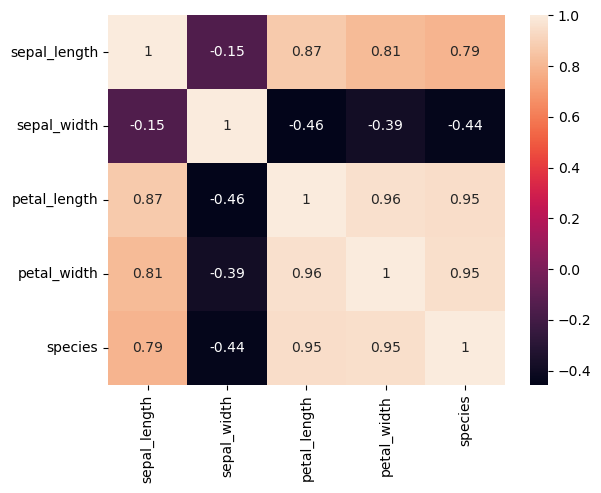

In [64]:
# plot the correlation metrics for the data
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(),annot = True)
plt.show()

In [65]:
# feature engineering
# create a field called 'petal_total' == 'petal_length' + 'petal_width'
#data['petal_total'] = data['petal_length'] + data['petal_width']

In [66]:
# create a field called 'petal_total' == 'petal_length' + 'petal_width'
#data['sepal_total'] = data['sepal_length'] + data['sepal_width']

In [67]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


In [68]:
# model building

In [69]:
# split the data into train and test with 30% for train
from sklearn.model_selection import train_test_split
x = data.drop(['species'],axis = 1)
y = data['species']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=42)

In [70]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4


In [71]:
y.head()

0    0
1    0
2    0
4    0
5    0
Name: species, dtype: int64

In [72]:
# build the model with the DecisionTreeClassifier from sklearn
#import the model
from sklearn.tree import DecisionTreeClassifier

# initialise the algorithm
model = DecisionTreeClassifier()

# Train the model
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [73]:
# run a prediction on the test set
y_pred = model.predict(x_test)
y_pred

array([2, 1, 0, 0, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 0, 1], dtype=int64)

In [74]:
y_test

70     1
52     1
26     0
42     0
133    2
71     1
85     1
123    2
97     1
35     0
113    2
36     0
79     1
5      0
115    2
118    2
48     0
96     1
111    2
101    2
24     0
14     0
138    2
15     0
144    2
60     1
86     1
94     1
62     1
0      0
17     0
54     1
147    2
33     0
83     1
131    2
107    2
21     0
93     1
Name: species, dtype: int64

In [75]:
# Model evaluation

In [76]:
# check for the accuracy of our prediction and generate a classification report
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_pred))

0.9487179487179487


In [77]:
# generate a classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.86      0.92        14
           2       0.86      1.00      0.92        12

    accuracy                           0.95        39
   macro avg       0.95      0.95      0.95        39
weighted avg       0.96      0.95      0.95        39



In [79]:
# Random forest

In [80]:
# Build a model using the Randomforest Algorithm
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [82]:
# Make predictions on the test data and check the accuracy
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9487179487179487


In [84]:
# Generate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.86      0.92        14
           2       0.86      1.00      0.92        12

    accuracy                           0.95        39
   macro avg       0.95      0.95      0.95        39
weighted avg       0.96      0.95      0.95        39



In [87]:
# k-nearest neighbour
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [89]:
# Make predictions on the test data and check the accuracy
y_pred = knn_model.predict(x_test)
print(accuracy_score(y_test, y_pred))


0.8974358974358975


In [90]:
# Generate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.81      0.93      0.87        14
           2       0.90      0.75      0.82        12

    accuracy                           0.90        39
   macro avg       0.90      0.89      0.89        39
weighted avg       0.90      0.90      0.90        39



In [93]:
# Support Vector machines
from sklearn import svm

svm.model = svm.SVC(kernel='linear', C=1)
svm.model.fit(x_train, y_train)


SVC(C=1, kernel='linear')

In [97]:
# Make predictions on the test data and check the accuracy
y_pred = svm.model.predict(x_test)
print(accuracy_score(y_test, y_pred))


0.9230769230769231


In [98]:
# Generate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.87      0.93      0.90        14
           2       0.91      0.83      0.87        12

    accuracy                           0.92        39
   macro avg       0.93      0.92      0.92        39
weighted avg       0.92      0.92      0.92        39

